In [ ]:
from rv import load_data

import numpy as np
import matplotlib.pyplot as plt

# Load Pickle

In [7]:
data = load_data('data.pkl')

# Barycentric Time

APW believes (not is not 100% positive) that APOGEE JD values are already varycentric (TCB). If they weren't already, here's how you convert them with `astropy`.

In [8]:
import astropy.time as ati

In [ ]:
# Which binary system will we inspect?
idx = 20

aapstar_id = list(data.keys())[idx]
jd = data[aapstar_id]['jd'].flatten()
vhelio = data[aapstar_id]['vhelio'].flatten()

In [48]:
# Using `astropy.time.Time` to convert
time = ati.Time(jd, format='jd', scale='utc')
time_barycentric = time.tcb # returns a new Time object in TCB scale
time_barycentric = time_barycentric.value

print('Did the times get changed?')
print(time_barycentric != jd)

print('What is the difference?')
print(time_barycentric - jd)



Did the times get changed?
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True]
What is the difference?
[0.00104886 0.00102783 0.00102936 0.00101264 0.00103567 0.00100857
 0.001032   0.0010324  0.00103703 0.00104241 0.00104773 0.00103891
 0.00104897 0.00104898]


[False False False False False False False False False False False False
 False False]


Text(0, 0.5, 'RV (km/s)')

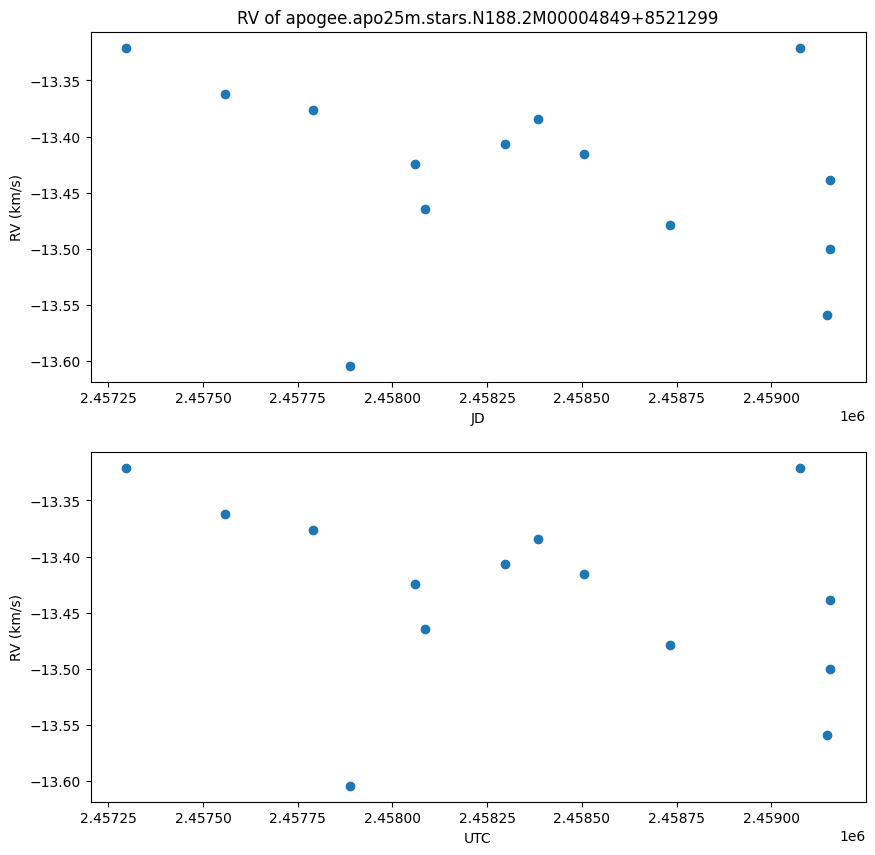

In [ ]:


fig, ax = plt.subplots(2, 1, figsize=(10, 10))

# Original time
ax[0].scatter(jd, vhelio)
ax[0].set_xlabel('JD')
ax[0].set_ylabel('RV (km/s)')
ax[0].set_title(f'RV of {aapstar_id}')

# Barycentric time
ax[1].scatter(time_barycentric, vhelio)
ax[1].set_xlabel('UTC')
ax[1].set_ylabel('RV (km/s)')